In [0]:
#import the all fastai library
from fastai import*


In [0]:
#import vision library from fastai
from fastai.vision import*

In [3]:
#download the data
camvid = untar_data(URLs.CAMVID_TINY)
#for predict the class of each pixel in an image. Each image in the 'images' subfolder 
path_lbl = camvid/'labels'
#each labels in the labels sub folder 
path_img = camvid/'images'

In [0]:
#read the class codes.txt
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
#mapping the funtion 
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
#create the databunches  and normalize the the databunch
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid)
        .normalize(imagenet_stats))

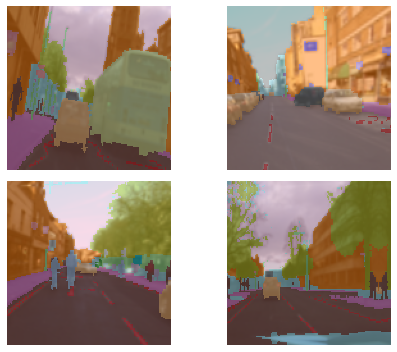

In [6]:
#show the databunches
data.show_batch(rows=2, figsize=(7,5))

In [7]:
#create the models
learn = unet_learner(data, models.resnet18)
#train the models
learn.fit_one_cycle(3,1e-2)
#save the predicted models 
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,time
0,7.576643,2.435041,00:03
1,5.572370,2.554250,00:01
2,4.238981,2.655421,00:01


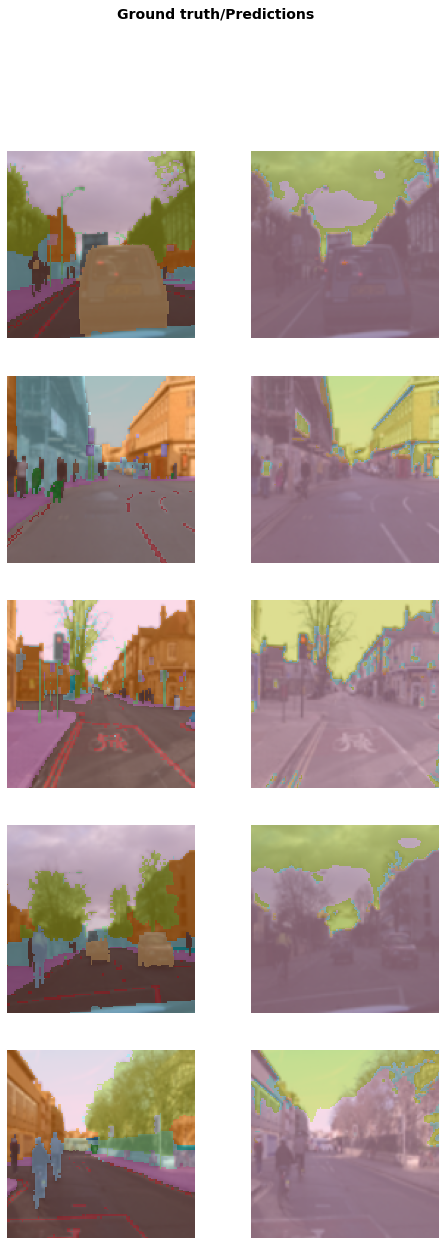

In [8]:
#show the trained models
learn.show_results()